In [126]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [127]:
from pylab import rcParams
#rcParams['figure.figsize'] = 13, 4
rcParams['figure.figsize'] = 13, 6

In [128]:
# The directory path
DIR = 'C:/Users/User/Desktop/Kaggle/Data/Sberbank Russian Housing Market/'
to_ensemble = 'C:/Users/User/Desktop/Kaggle/Data/Sberbank Russian Housing Market/to_ensemble/'

In [129]:
train = pd.read_csv(DIR + 'train.csv')
test = pd.read_csv(DIR + 'test.csv')
macro = pd.read_csv(DIR + 'macro.csv')

print('Train shape = ' + str(train.shape))
print('Test shape = ' + str(test.shape))
print('Macro shape = ' + str(macro.shape))

Train shape = (30471, 292)
Test shape = (7662, 291)
Macro shape = (2484, 100)


In [130]:
train['green > ind'] = (train['green_zone_part'] > train['indust_part']).astype(int)
test['green > ind'] = (test['green_zone_part'] > test['indust_part']).astype(int)

In [131]:
d = {'yes' : 1, 'no' : 0}
for j in ['culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion',
         'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion',
         'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line']:
    train[j] = train[j].apply(lambda x: d[x])
    test[j] = test[j].apply(lambda x: d[x])

In [132]:
#Детей на детские сады
train['child_per_preschool'] = train['children_preschool'] / train['preschool_education_centers_raion']
test['child_per_preschool'] = test['children_preschool'] / test['preschool_education_centers_raion']

#Детей на школы
train['child_per_school'] = train['children_school'] / train['school_education_centers_raion']
test['child_per_school'] = test['children_school'] / test['school_education_centers_raion']

train['all_kids'] = train['children_school'] + train['children_preschool']
test['all_kids'] = test['children_school'] + test['children_preschool']

#Обычные школы: школы - топ-20 школы
train['reg_schools'] = train['school_education_centers_raion'] - train['school_education_centers_top_20_raion']
test['reg_schools'] = test['school_education_centers_raion'] - test['school_education_centers_top_20_raion']

#Детсады + школы + госпитали + ...
train['rayon_goods'] = train['big_market_raion'] + train['office_raion'] + train['shopping_centers_raion'] + train['additional_education_raion'] + train['preschool_education_centers_raion'] + train['school_education_centers_raion'] + train['healthcare_centers_raion'] + train['sport_objects_raion']
test['rayon_goods'] = test['big_market_raion'] + test['office_raion'] + test['shopping_centers_raion'] + test['additional_education_raion'] + test['preschool_education_centers_raion'] + test['school_education_centers_raion'] + test['healthcare_centers_raion'] + test['sport_objects_raion']

train['rayon_bads'] = train['detention_facility_raion'] + train['nuclear_reactor_raion'] + train['incineration_raion'] + train['oil_chemistry_raion']
test['rayon_bads'] = test['detention_facility_raion'] + test['nuclear_reactor_raion'] + test['incineration_raion'] + test['oil_chemistry_raion']

#Топ-универы + топ-школы
train['top-schools + top-university'] = train['university_top_20_raion'] + train['school_education_centers_top_20_raion']
test['top-schools + top-university'] = test['university_top_20_raion'] + test['school_education_centers_top_20_raion']

In [133]:
train['male_perc'] = train['male_f'] / train['full_all']
test['male_perc'] = test['male_f'] / test['full_all']

train['female_perc'] = train['female_f'] / train['full_all']
test['female_perc'] = test['female_f'] / test['full_all']

train['young_perc'] = train['young_all'] / train['full_all']
test['young_perc'] = test['young_all'] / test['full_all']

train['young_male'] = train['young_male'] / train['young_all']
test['young_male'] = test['young_male'] / test['young_all']

train['young_female'] = train['young_female'] / train['young_all']
test['young_female'] = test['young_female'] / test['young_all']

In [134]:
train['work_perc'] = train['work_all'] / train['full_all']
test['work_perc'] = test['work_all'] / test['full_all']

train['working_male'] = train['work_male'] / train['work_all']
test['working_male'] = test['work_male'] / test['work_all']

train['working_female'] = train['work_female'] / train['work_all']
test['working_female'] = test['work_female'] / test['work_all']

train['elder_perc'] = train['ekder_all'] / train['full_all']
test['elder_perc'] = test['ekder_all'] / test['full_all']

train['elder_work_perc'] = train['ekder_all'] / train['work_all']
test['elder_work_perc'] = test['ekder_all'] / test['work_all']

train['elder_males'] = train['ekder_male'] / train['ekder_all']
test['elder_males'] = test['ekder_male'] / test['ekder_all']

train['elder_females'] = train['ekder_female'] / train['ekder_all']
test['elder_females'] = test['ekder_female'] / test['ekder_all']

In [135]:
for j in ['0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all',
         '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female']:
    train[j + '_perc'] = train[j] / train['full_all']
    test[j + '_perc'] = test[j] / test['full_all']
    train[j + '_work_perc'] = train[j] / train['work_all']
    test[j + '_work_perc'] = test[j] / test['work_all']

In [136]:
train['metro_avto/metro_walk'] = train['metro_km_avto'] / train['metro_km_walk']
test['metro_avto/metro_walk'] = test['metro_km_avto'] / test['metro_km_walk']

train['metro_min_walk/metro_min_avto'] = train['metro_min_walk'] / train['metro_min_avto']
test['metro_min_walk/metro_min_avto'] = test['metro_min_walk'] / test['metro_min_avto']

In [137]:
for j in ['metro_km_walk', 'kindergarten_km', 'park_km', 'school_km', 'green_zone_km', 'industrial_km',
         'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_avto_km',
          'water_km', 'public_transport_station_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
         'kremlin_km', 'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km', 'bus_terminal_avto_km',
         'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
         'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
         'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 'workplaces_km',
         'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km',
          'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km']:
    train['exp(-' + j + ')'] = np.exp(-train[j])
    test['exp(-' + j + ')'] = np.exp(-test[j])

In [138]:
#Подсчитать частотность!
train['metro_ID_&_avto_dist_combo'] = train['ID_metro'].apply(lambda x: str(x)) + '|' + train['metro_km_avto'].apply(lambda x: str(int(x)))
test['metro_ID_&_avto_dist_combo'] = test['ID_metro'].apply(lambda x: str(x)) + '|' + test['metro_km_avto'].apply(lambda x: str(int(x)))

train['rail_ID_&_avto_dist_combo'] = train['ID_railroad_station_avto'].apply(lambda x: str(x)) + '|' + train['railroad_station_avto_km'].apply(lambda x: str(int(x)))
test['rail_ID_&_avto_dist_combo'] = test['ID_railroad_station_avto'].apply(lambda x: str(x)) + '|' + test['railroad_station_avto_km'].apply(lambda x: str(int(x)))

In [146]:
#Расстояние до транспортных ништяков
train['sum_of_transport_distances'] = train['public_transport_station_km'] + train['metro_km_walk'] + train['railroad_station_avto_km']
test['sum_of_transport_distances'] = test['public_transport_station_km'] + test['metro_km_walk'] + test['railroad_station_avto_km']

train['-exp(sum_of_transport_distances)'] = np.exp((-1) * (train['public_transport_station_km'] + train['metro_km_walk'] + train['railroad_station_avto_km']))
test['-exp(sum_of_transport_distances)'] = np.exp((-1) * (test['public_transport_station_km'] + test['metro_km_walk'] + test['railroad_station_avto_km']))

In [155]:
#Расстояние до магазинов
train['sum_of_shop_distances'] = train[['shopping_centers_km', 'big_market_km', 'market_shop_km']].sum(axis = 1)
test['sum_of_shop_distances'] = test[['shopping_centers_km', 'big_market_km', 'market_shop_km']].sum(axis = 1)

train['-exp(sum_of_shop_distances)'] = np.exp(-train[['shopping_centers_km', 'big_market_km', 'market_shop_km']].sum(axis = 1))
test['-exp(sum_of_shop_distances)'] = np.exp(-test[['shopping_centers_km', 'big_market_km', 'market_shop_km']].sum(axis = 1))

In [160]:
train[['rayon_goods', 'rayon_bads', 'price_doc', 'sum_of_shop_distances', '-exp(sum_of_shop_distances)']].corr()

,rayon_goods,rayon_bads,price_doc,sum_of_shop_distances,-exp(sum_of_shop_distances)
rayon_goods,1.000000,0.277331,0.200563,-0.288651,0.044204
rayon_bads,0.277331,1.000000,-0.018334,-0.166171,0.002232
price_doc,0.200563,-0.018334,1.000000,-0.128952,0.036525
sum_of_shop_distances,-0.288651,-0.166171,-0.128952,1.000000,-0.221260
-exp(sum_of_shop_distances),0.044204,0.002232,0.036525,-0.221260,1.000000


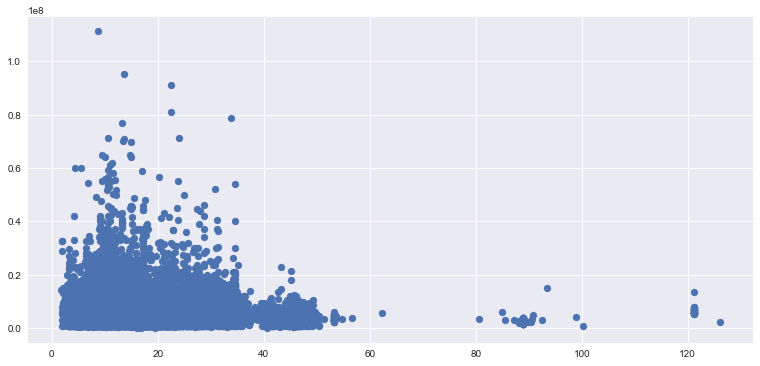

In [159]:
plt.scatter(train['sum_of_shop_distances'], train['price_doc'])